## Engenharia de Sistemas de Software Inteligentes - Aluno: João Paulo Pimentel Dias
## MVP Sistemas Inteligentes

In [72]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from pickle import dump
from pickle import load

## Carga do Dataset

In [73]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/jp2d/MVP_Sistemas_Inteligentes/refs/heads/main/customer_churn_data.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=';', decimal=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,2,4,88.35,1,2,353.40,1,1
1,43,2,0,36.67,1,2,0.00,1,1
2,51,1,2,63.79,1,2,127.58,0,1
3,60,1,8,102.34,2,1,818.72,1,1
4,42,2,32,69.01,1,3,2208.32,0,1


## Separação em conjunto de treino e conjunto de teste com holdout

## Modelagem e Inferência

In [74]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:8]
y = array[:,8].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

### Criação e avaliação de modelos: linha base

KNN: 0.871250 (0.018583)
CART: 1.000000 (0.000000)
NB: 0.888750 (0.021250)
SVM: 0.882500 (0.006124)


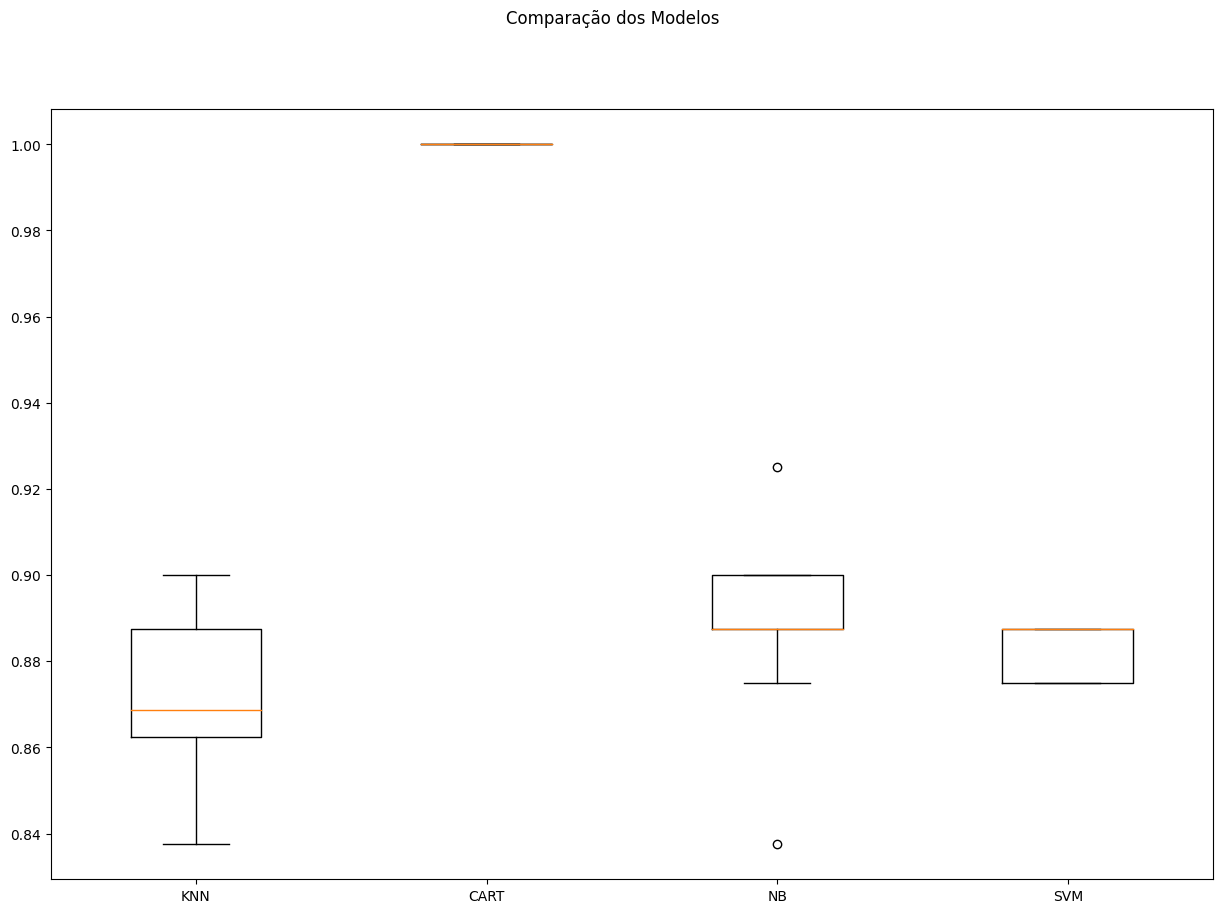

In [75]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Criação e avaliação de modelos: dados padronizados e normalizados

KNN-orig: 0.871 (0.019)
CART-orig: 1.000 (0.000)
NB-orig: 0.889 (0.021)
SVM-orig: 0.882 (0.006)
KNN-padr: 0.952 (0.020)
CART-padr: 1.000 (0.000)
NB-padr: 0.621 (0.026)
SVM-padr: 0.966 (0.022)
KNN-norm: 0.927 (0.035)
CART-norm: 1.000 (0.000)
NB-norm: 0.621 (0.026)
SVM-norm: 0.954 (0.024)


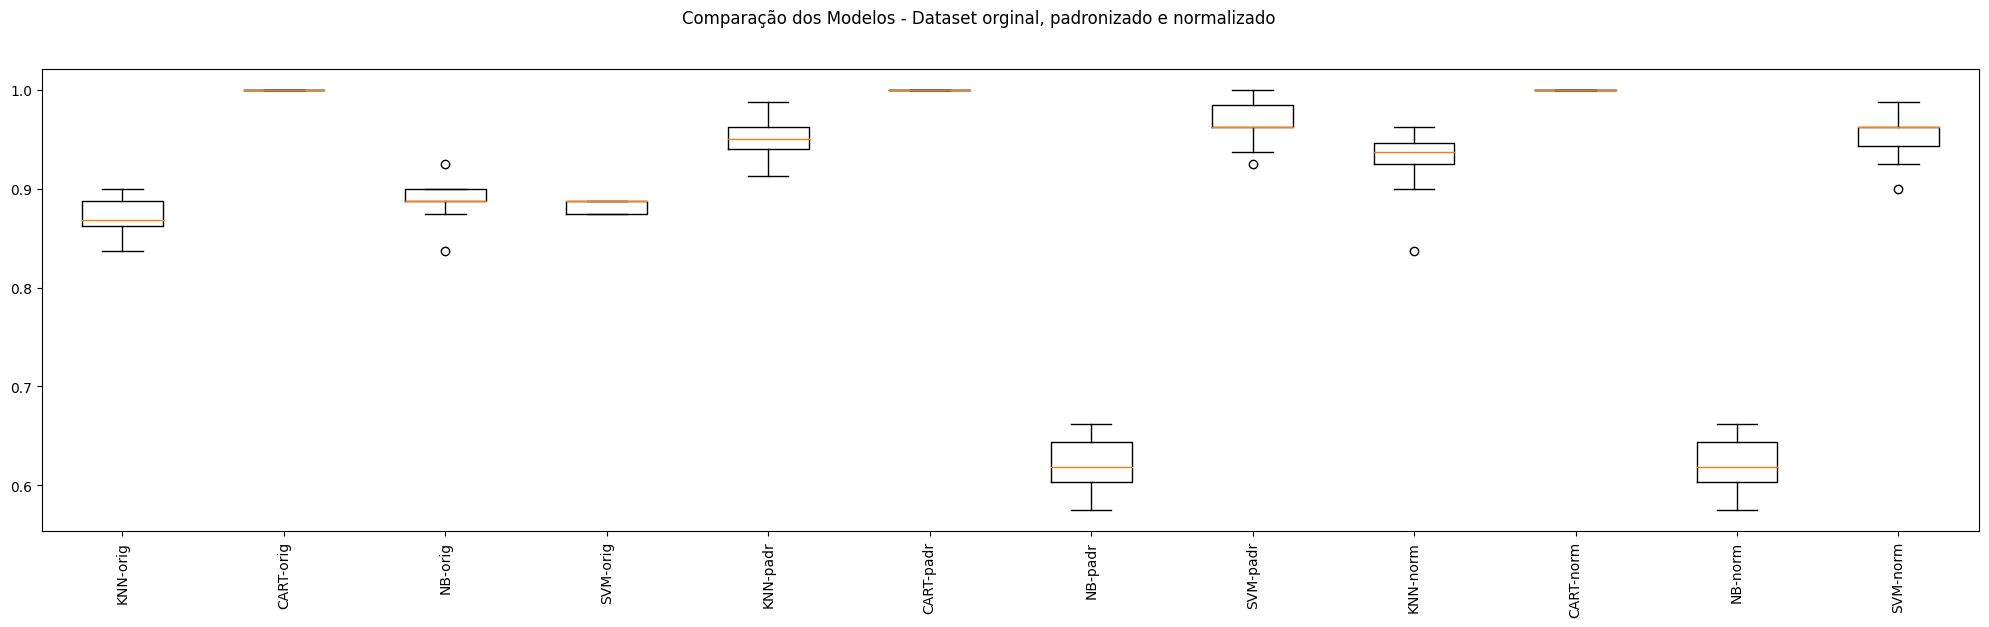

In [76]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Dataset Padronizado
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Dataset Normalizado
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

### Otimização dos hiperparâmetros

In [78]:
# Tuning do KNN

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
knn = ('KNN', KNeighborsClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('knn-orig', Pipeline(steps=[knn])))
pipelines.append(('knn-padr', Pipeline(steps=[standard_scaler, knn])))
pipelines.append(('knn-norm', Pipeline(steps=[min_max_scaler, knn])))

param_grid = {
    'KNN__n_neighbors': [1,3,5,7,9,11,13,15,17,19,21],
    'KNN__metric': ["euclidean", "manhattan", "minkowski"],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: knn-orig - Melhor: 0.882500 usando {'KNN__metric': 'euclidean', 'KNN__n_neighbors': 13}
Sem tratamento de missings: knn-padr - Melhor: 0.965000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 13}
Sem tratamento de missings: knn-norm - Melhor: 0.955000 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 19}


## Finalização do Modelo

In [79]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = KNeighborsClassifier(metric='manhattan', n_neighbors=13)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.975


In [81]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

KNeighborsClassifier(metric='manhattan', n_neighbors=13)

## Simulando a aplicação do modelo em dados não vistos

In [88]:
# Novos dados - não sabemos a classe!
data = {'Age':  [51, 69, 35],
        'Gender': [2, 1, 2],
        'Tenure': [2, 6, 5],
        'MonthlyCharges': [30.50, 45.10, 38.99],
        'ContractType': [2, 3, 1],
        'InternetService': [3, 2, 1],
        'TotalCharges': [61.0, 45.10, 194.95],
        'TechSupport': [15, 40, 40]
        }

atributos = ['Age', 'Gender', 'Tenure', 'MonthlyCharges', 'ContractType', 'InternetService', 'TotalCharges', 'TechSupport']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:8].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

[[ 6.45982137e-01  1.07912101e+00 -8.98845043e-01 -1.70788388e+00
   3.96805383e-01  1.29992083e+00 -8.55118135e-01  2.89900874e+01]
 [ 2.48405967e+00 -9.26680128e-01 -6.87015657e-01 -1.13977333e+00
   1.67270693e+00  1.41435500e-02 -8.65239277e-01  7.89936878e+01]
 [-9.87864558e-01  1.07912101e+00 -7.39973003e-01 -1.37752370e+00
  -8.79096169e-01 -1.27163373e+00 -7.69852288e-01  7.89936878e+01]]


In [89]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[1 1 1]


Exportação do modelo

In [90]:
# Salva o modelo no disco
filename = 'model.pkl'
dump(model, open(filename, 'wb'))
